LIEW WEI BRIAN - A0239041M

# Task 1: Data Loading and Exploration (25 marks)

## Data Loading (10 marks)

In [0]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder.appName("BankMarketing").getOrCreate()

# Load CSV file into a DataFrame
df = spark.read.csv("/FileStore/tables/bank-full.csv", header=True, inferSchema=True, sep=";")


## Exploration Using DataFrame API and Spark SQL (15 marks) 

In [0]:
# Show Schema
df.printSchema()

# Show first 5 rows
df.show(5, truncate=False)

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)

+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|job         |marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|y  |
+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+

Displaying the schema and showing a sample of the data allows us to understand the structure of the dataset. This includes the column names, number of columns in the dataset, the data type of each column, whether the column allows for null values (nullable = true) or does not (nullable = false).

Knowing the number of columns allows us to ensure that we do not miss out on features during feature engineering and model training. Understanding the datatype as well as displaying the columns allows us to better understand if the feature is a numerical, categorical or ordinal data - which will be handled differently in the feature engineering and model training process later on. Knowing whether the column is nullable or not allows us to see if there can potentially be missing values in the dataset, and printing the schema further allows us to see how the potential missing values were handled - in this case missing values were marked as "unknown".

In [0]:
# Register DataFrame as a temporary SQL table
df.createOrReplaceTempView("bank_data")

# Use Spark SQL to count occurrences of each value in 'y'
y_counts = spark.sql("""
    SELECT y, COUNT(*) AS count
    FROM bank_data
    GROUP BY y
""")

# Show the results
y_counts.show()


+---+-----+
|  y|count|
+---+-----+
| no|39922|
|yes| 5289|
+---+-----+



To further understand our target variable better, we use Spark SQL to count occurrences of each value in "y". In this case, we can see that "y" has a datatype string, is labelled either "yes" or "no", and has a distribution of 5298 counts of "yes" and 39922 counts of "no".

In [0]:
# Spark SQL Query 1: Summary Statistics for Age
age_summary = spark.sql("""
    SELECT COUNT(age) as total_records, 
           AVG(age) as avg_age, 
           MIN(age) as min_age, 
           MAX(age) as max_age
    FROM bank_data
""")
age_summary.show()

# Spark SQL Query 2: Summary Statistics for Balance
balance_summary = spark.sql("""
    SELECT COUNT(balance) as total_records, 
           AVG(balance) as avg_balance, 
           MIN(balance) as min_balance, 
           MAX(balance) as max_balance
    FROM bank_data
""")
balance_summary.show()

# Spark SQL Query 3: Summary Statistics for Duration
duration_summary = spark.sql("""
    SELECT COUNT(duration) as total_records, 
           AVG(duration) as avg_duration, 
           MIN(duration) as min_duration, 
           MAX(duration) as max_duration
    FROM bank_data
""")
duration_summary.show()

# Spark SQL Query 4: Summary Statistics for Campaign
campaign_summary = spark.sql("""
    SELECT COUNT(campaign) as total_records, 
           AVG(campaign) as avg_campaign, 
           MIN(campaign) as min_campaign, 
           MAX(campaign) as max_campaign
    FROM bank_data
""")
campaign_summary.show()




+-------------+-----------------+-------+-------+
|total_records|          avg_age|min_age|max_age|
+-------------+-----------------+-------+-------+
|        45211|40.93621021432837|     18|     95|
+-------------+-----------------+-------+-------+

+-------------+------------------+-----------+-----------+
|total_records|       avg_balance|min_balance|max_balance|
+-------------+------------------+-----------+-----------+
|        45211|1362.2720576850766|      -8019|     102127|
+-------------+------------------+-----------+-----------+

+-------------+-----------------+------------+------------+
|total_records|     avg_duration|min_duration|max_duration|
+-------------+-----------------+------------+------------+
|        45211|258.1630797814691|           0|        4918|
+-------------+-----------------+------------+------------+

+-------------+-----------------+------------+------------+
|total_records|     avg_campaign|min_campaign|max_campaign|
+-------------+-----------------

Next, we use Spark SQL Queries to understand the demographic features (age, balance) and campaign attribute features (duration, campaign) of the dataset. We will calculate the summary statistics (count, average, min, max) of each.

Theres a total of 45211 rows of data, which is reflected in the column "total_records" of each summary statistic table, helping me understand the dataset scale.

First we look at the age demographic feature. The minimum age of the bank customer is 18, indicating that the dataset does not include minors. The maximum age is 95, indicating the presence of older bank clients, which may influence deposit subscription behaviour. The average age is also approximately 40.9 years, indicating that the dataset comprises a diverse range of customer ages. Understanding the age distrubtion also gives us an idea where we might group ages into different categories such as "Young", "Middle-aged" and "Senior", which might allow us to better utilise the age feature to predict deposit subcription as opposed to a numerical age value.

Secondly, we look at the balance demographic feature, which indicates the average yearly balance of customers. The minimum average yearly balance of -8019 indicates that customers may have negative yearly balance and some customers may have significant overdrafts. The maximum average yearly balance is 102127, suggesting that there are individuals with high net worth in the bank customer dataset. The average balance of 1362.7 indicates that most customers maintain a positive bank balance. This might prompt us to investigate whether customers with negative balances are less inclined to take up subscriptions or wehether higher balance correlates with higher subscription rates.

Thirdly, we look at the duration feature, which indicates the last contact duration between the bank and the customer in seconds. The minimum call duration of 0 seconds indicates that some calls were unsuccessful. The maximum call duration of 4918 seconds (approximately 82 minutes) suggests that the longest duration of call could be quite long but could potentially be an outlier data as the average call duration is 258 seconds (approximately 4.3 minutes). This prompts us to analyse the relationship between last call duruation and subscription to see if the duration of the call could potentially indicate a higher chance of subcription.

Lastly, we look at the campaign feature, which indicates the number of contacts performed during this campaign between the bank and the customer. The minimum number of contact is 1, while some customers were contacted up to 63 times. Extremely high contact numbers may indicate aggressive marketing strategies. On average, customers were contacted approximately 2.76 times, and this prompts us to seek if repeated calls actually increase subscription rates and if there is an optimal number of calls before customer dissatisfaction kicks in and rate of subscription falls.



# Task 2: Feature Engineering with Window Functions (25 marks) 

## Target Variable Transformation (5 marks)

In [0]:
from pyspark.sql.functions import when, col

df = df.withColumn("subscription", when(col("y") == "yes", 1).otherwise(0)).drop("y")

subscription_counts = df.groupBy("subscription").count()
subscription_counts.show()
df.show(5)

+------------+-----+
|subscription|count|
+------------+-----+
|           1| 5289|
|           0|39922|
+------------+-----+

+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------+
|age|         job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|subscription|
+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------+
| 58|  management|married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown|           0|
| 44|  technician| single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown|           0|
| 33|entrepreneur|married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown|           0|
| 47| blue-collar|married|  unknown|   

## Window Functions (10 marks) 

In [0]:
from pyspark.sql.functions import avg
from pyspark.sql.window import Window

# Define window specification: Compute average call duration per job category
window_spec = Window.partitionBy("job")

# Compute the average call duration within each job category
df = df.withColumn(
    "avg_call_duration_per_job",
    avg("duration").over(window_spec)
)

# Register updated DataFrame as a temporary table
df.createOrReplaceTempView("bank_data_enriched")

# Verify transformation
spark.sql("""
    SELECT job, COUNT(*) as count, AVG(avg_call_duration_per_job) AS avg_duration
    FROM bank_data_enriched
    GROUP BY job
    ORDER BY avg_duration DESC
""").show()

# Show first 5 rows
df.show(5)


+-------------+-----+------------------+
|          job|count|      avg_duration|
+-------------+-----+------------------+
|   unemployed| 1303| 288.5433614735223|
|      retired| 2264|287.36130742049704|
|self-employed| 1579|268.15706143128034|
|  blue-collar| 9732| 262.9015618578101|
|     services| 4154| 259.3187289359899|
| entrepreneur| 1487| 256.3093476798958|
|   management| 9458|253.99577077612787|
|   technician| 7597| 252.9049624851905|
|       admin.| 5171|246.89673177337224|
|      student|  938| 246.6567164179063|
|    housemaid| 1240|245.82500000000573|
|      unknown|  288|237.61111111110995|
+-------------+-----+------------------+

+---+-----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------+-------------------------+
|age|        job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|subscription|avg_call_duration_per_job|
+---+----------

We have used the window function to create one new feature "avg_call_duration_per_job" to capture customer engagement within job categories.

Logic:
1. We first define a window partition by job. This ensures that computation in performed within each respective job category so that every customer within the same job category will get the same job-specific average.
2. We then compute the average call duration using the "duration" column for each job category. AVG(duration).over(window_spec) calculates the average call length for customers in the same job.
3. We then add the computed value as a new column "avg_call_duration_per_job".

Intended Benefit:

The primary goal of the dataset is that we want to predict if a customer will subscribe to a term based deposit. avg_call_duration_per_job helps us to identify which job cateogies engage more during calls and a higher avg_call_duration_per_job suggests that customers in a particular job category tend to stay longer on calls, potentially indicating a heightened interest level. This helps to prioritise job segments which are more likely to opt for the deposit subscription. This can be used to adjust marketing strategies to focus more on job categories where longer calls lead to higher subscription rates.




## Additional Features (7 marks) 

 Feature 1: Age Group Categorisation (Customer Demographics)


In [0]:
from pyspark.sql.functions import when

df = df.withColumn("age_group",
    when(col("age") < 30, "Young")
    .when((col("age") >= 30) & (col("age") < 60), "Middle-aged")
    .otherwise("Senior")
)

df.show(5)

+---+-----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------+-------------------------+-----------+
|age|        job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|subscription|avg_call_duration_per_job|  age_group|
+---+-----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------+-------------------------+-----------+
| 47|blue-collar|married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown|           0|       262.90156185778875|Middle-aged|
| 57|blue-collar|married|  primary|     no|     52|    yes|  no|unknown|  5|  may|      38|       1|   -1|       0| unknown|           0|       262.90156185778875|Middle-aged|
| 28|blue-collar|married|secondary|     no|    723|    yes| yes|unknown|  5|  may|     262|       1|   -1|       0| unkn

A new "age_group" feature was created because in marketing campaigns, age is a key demographic feature that influences behaviour and decision making. Different age groups tend to exhibit different engagement levels and deposit take up rates. Instead of treating age as a continuous variable, we categorise them into 3 age groups: Young (<30), Middle-aged (30-59), Senior(>=60).

Individuals in the Young category are likely to be early in their careers and have lower savings, and could be less likely to invest in deposits. Individuals in the Middle-aged category are likely to be more financially stable hence more inclined to consider deposits with the bank. Individuals in the Senior category are likely retired or will retire soon, hence will be more concerned with secure investment options, hence termed deposits may appeal to them.

Categorising age makes the model more interpretable instead of using raw age.

 Feature 2: Engagement Rate (Campaign Data)

In [0]:
df = df.withColumn("engagement_rate", col("campaign") / (col("duration") + 1))

df.show(5)

+---+-----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------+-------------------------+-----------+--------------------+
|age|        job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|subscription|avg_call_duration_per_job|  age_group|     engagement_rate|
+---+-----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+------------+-------------------------+-----------+--------------------+
| 47|blue-collar|married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown|           0|       262.90156185778875|Middle-aged|0.010752688172043012|
| 57|blue-collar|married|  primary|     no|     52|    yes|  no|unknown|  5|  may|      38|       1|   -1|       0| unknown|           0|       262.90156185778875|Middle-aged| 0.02564102564102564|
| 28|blue-colla

A new "engagement_rate" feature was created to quantify how engaged a customer is during the campaign by calculating the (last contact duration / number of contacts performed during this campaign + 1), where + 1 prevents zero division error.

High engagement_rate indicates that the customer has been contacted multiple times but spends very little time on calls. This may suggest a lack of interest or call fatigue, requiring a different outreach strategy. Low engagement_rate suggests that the customer had fewer calls but engaged in longer conversations, which may indicate higher interest and a greater likelihood of conversion. 

By incorporating engagement_rate, the campaign can be better optimized by identifying highly engaged customers and adjusting call frequency and messaging strategies accordingly.




## Documentation (3 marks) 

In summary, we added 3 new features "avg_call_duration_per_job", "age_group", "engagement_rate". 

"avg_call_duration_per_job" captures job-based engagement trends by computing the average call duration for each job category. This helps identify which job groups are more engaged, allowing the model to prioritise job segments with higher subscription likelihood. Since longer call durations often indicate higher interest, this feature enables the model to prioritise job segments with a greater likelihood of subscription.

"age_group" categorises customers into Young (<30), Middle-aged (30-59), and Senior (≥60). Different age groups exhibit distinct financial behaviors, making this feature more interpretable and enabling age-specific marketing strategies. Since different age groups have varying financial priorities, the model can better capture the relationship between age and deposit subscription likelihood. By improving interpretability, this feature also helps in identifying which age group is most responsive to marketing efforts.

"engagement_rate" measures customer responsiveness by dividing campaign calls by call duration. A high engagement rate suggests call fatigue or low interest, while a low engagement rate indicates stronger interest, helping optimise outreach strategies. This feature quantifies customer responsiveness to marketing calls, helping the model distinguish between actively interested customers and those experiencing call fatigue.

These features improve prediction accuracy by capturing customer engagement patterns, financial stability, and responsiveness, enabling more targeted marketing and better subscription predictions.

In [0]:
df = df.drop("job", "duration", "campaign", "age")


"duration" column is dropped because the new feature avg_call_duration_per_job captures job-specific engagement trends, and engagement_rate uses duration for normalisation.

"campaign" column is dropped because the engagement_rate feature already incorporates campaign by dividing it by duration + 1, so keeping both may introduce multicollinearity.

"age" column is dropped because the age_group feature segments customers into categories, making the raw age column unnecessary.

"job" is dropped because avg_call_duration_per_job effectively captures job-specific behavior and every value of avg_call_duration_per_job is entirely dependent on job hence keeping "job" may introduce multicollinearity.

# Task 3: Pipeline Construction and Model Training (25 marks) 

## Pipeline Construction (12 marks) 

In [0]:
# Show Schema
df.printSchema()

# Show first 5 rows
df.show(5)

root
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- subscription: integer (nullable = false)
 |-- avg_call_duration_per_job: double (nullable = true)
 |-- age_group: string (nullable = false)
 |-- engagement_rate: double (nullable = true)

+-------+---------+-------+-------+-------+----+-------+---+-----+-----+--------+--------+------------+-------------------------+-----------+--------------------+
|marital|education|default|balance|housing|loan|contact|day|month|pdays|previous|poutcome|subscription|avg_call_duration_per_job|  age_group|     engagement_rate|
+-------+--

### 3.1 Define Categorical & Numerical Features

In [0]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

# Define Categorical & Numerical Features

# Categorical features that need encoding
categorical_cols = ["marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "age_group"]

# Numerical features (Already in numeric form)
numerical_cols = ["balance", "day", "pdays", "previous", "avg_call_duration_per_job", "engagement_rate"]

# Target column
target_col = "subscription"


### 3.2 Encode Categorical Variables

In [0]:
# Encode Categorical Variables
# Index categorical columns
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index") for col in categorical_cols]

# One-hot encoding for categorical columns
encoders = [OneHotEncoder(inputCol=col + "_index", outputCol=col + "_encoded") for col in categorical_cols]


### 3.3 Assemble & Scale Numerical Features

In [0]:
# Assemble & Scale Numerical Features
assembler_numerical = VectorAssembler(inputCols=numerical_cols, outputCol="numerical_features")
scaler = StandardScaler(inputCol="numerical_features", outputCol="scaled_numerical_features", withMean=True, withStd=True)

### 3.4 Assemble Final Feature Vector

In [0]:
# Assemble Final Feature Vector
feature_cols = [col + "_encoded" for col in categorical_cols] + ["scaled_numerical_features"]
assembler_final = VectorAssembler(inputCols=feature_cols, outputCol="features")

### 3.5 Define and Train Logistic Regression Model

In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

# Define the Classifier
# Define Logistic Regression Model
lr = LogisticRegression(featuresCol="features", labelCol="subscription")

# Build ML Pipeline (Include assembler_numerical)
pipeline = Pipeline(stages=indexers + encoders + [assembler_numerical, scaler, assembler_final, lr])

# Fit the Model
model = pipeline.fit(df)

# Make Predictions
predictions = model.transform(df)

# Show Results
predictions.select("subscription", "features", "prediction").show(5)


+------------+--------------------+----------+
|subscription|            features|prediction|
+------------+--------------------+----------+
|           0|(32,[0,5,6,7,9,10...|       0.0|
|           0|(32,[0,4,5,6,7,9,...|       0.0|
|           0|(32,[0,2,5,6,9,10...|       0.0|
|           0|(32,[1,4,5,6,9,10...|       0.0|
|           0|(32,[0,2,5,6,7,9,...|       0.0|
+------------+--------------------+----------+
only showing top 5 rows



## Documentation (Part 1 - Pipeline Construction)

3.1 Define Categorical & Numerical Features

In the first step of the pipeline construction, we distinguish between categorical features, numerical features and the target variable. Categorical features are text-based variables which will need to be converted into numerical form before model training. Numerical features are already in numeric format and do not require encoding, but require scaling to prevent features with large values from dominating the model. The target column "subscription" is a binary classification target, where 0 = no subscription and 1 = subscription.

3.2 Encode Categorical Variables

To encode categorical variables, we first use StringIndexer to convert categorical variables into numerical indices. After which, we apply OneHotEncoder to convert numerical indices into binary vectors which are suitable to be used for machine learning models. This ensures that categories are represented correctly without implying an incorrect ordinal relationship.

3.3 Assemble & Scale Numerical Features

Next, we use VectorAssembler to combine all numerical features into a single feature vector ("numerical_features") since Spark ML models expect input as vectors.

We then take "numerical_features" as input and apply StandardScaler, which standardises the numerical features to have zero mean (mean = 0) and unit variance (standard deviation = 0). This prevents features with large values from dominating the model.

3.4 Assemble Final Feature Vector

We then combine both one hot encoded categorical features and numerical features ("numerical_features") into a single vector called "features".

3.5 Define and Train Logistic Regression Model

We then create a logistic regression classifier that will use "features" as the input cariable and "subscription" as the target label. The logistic regression predicts the probability of a customer subscribing to term deposit.

The pipeline consists of multiple preprocessing steps, including categorical encoding (StringIndexer, OneHotEncoder), numerical feature scaling (StandardScaler) and feature vector assembly (VectorAssembler), ensuring that the data is properly formatted before training. The pipeline.fit(df) step applies these transformations and trains the model, while model.transform(df) generates predictions.

Finally, predictions.select("subscription", "features", "prediction").show(5) displays the actual subscription values alongside the predicted outcomes and transformed feature vectors for evaluation.

## Hyperparameter Tuning (7 marks) 

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Build ML Pipeline (Include assembler_numerical)
pipeline = Pipeline(stages=indexers + encoders + [assembler_numerical, scaler, assembler_final, lr])

# Define parameter grid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
    .addGrid(lr.maxIter, [5, 10])  # Number of iterations for optimization
    .addGrid(lr.threshold, [0.3, 0.5])  # Decision threshold
    .build())

# Define evaluator for binary classification
evaluator = BinaryClassificationEvaluator(labelCol="subscription", metricName="areaUnderROC")

# Define CrossValidator with 3-fold cross-validation
cv = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=3)


## Documentation (Part 2 - Hyperparameter Tuning)

We then prepare the model for hyperparameter tuning. 

We first define the parameter grid for hyperparameter tuning. The parameter grid will allow us to test different combinations to find the best model performance. In this case, the combinations include: 
lr.maxIter: Number of iterations for model training (5 and 10)
lr.threshold: Classification decision threshold (0.3 and 0.5)

Next, we define an evaluator for binary classification using AUC (Area Under ROC Curve). This allows us to pick the best model based on how well it separates the positive and negative classes. This is valuable for marketing because we care about how confidently the model predicts likelihood of subscription so you can target high-potential leads.

Next, we initialise a 3-fold cross-validation. We split the data into 3 folds and for each combination of hyperparameters, we train on 2 folds and validate on the 3rd. This way, we can select the model that performs best across all data splits, preventing overfitting and improving generalisation.


## Documentation (Part 3 - Spark & Hyperparameter Tuning Benefits)

Spark Benefits in ML Pipeline
1. Parallel Data Preprocessing
Spark splits the dataset into smaller partitions and distributes them acorss multiple worker nodes executors. This will enable operations such as StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler to run in parallel on data chunks, thereby speeding up feature transformation. 

2. Scalable Model Training & Hyperparameter Tuning
For models such as Logistic Regression, Spark distributes the training data and computes partial gradients on each partition. The partial gradients are then aggregated efficiently to update the model. This reduces training time significantly especially for larger datasets. During cross-validation and hyperparameter tuning, multiple models with different parameter settings (eg. different maxIter and threshold values) are trained in parallel across different worker nodes. Each fold in the k-fold validation will also be processed concurrently, enabling faster model selection and evaluation without overloading of a single machine. As the dataest grows bigger, Spark will handle it in-memory across nodes, preventing memory overflow and also reducing I/O bottlenecks.

Hyperparameter Tuning on Model Performance
- Hyperparameter tuning plays a key role in improving model performance by finding the best configuration of parameters that control the learning process. In this case, maxIter (maximum number of training iterations) and threshold (classification decision threshold) were used. Hyperparameter tuning optimises model convergence by finding the best combination of hyperparameters that leads to strong and generalisable performance because a low maxIter might result in underfitting because the model has not learnt enough while a high maxIter might result in overfitting where it learns noise in the training data rather than the underlying trends and thereby reducing its ability to generalise to unseen data. On the same note, a poorly chosen threshold can lead to more false positives or false negatives, and hyperparameter tuning can find the best threshold. By using ParamGridBuilder, we can try out multiple combinations and select the one that yields the highest Area Under ROC which reflects the model’s ability to distinguish between positive and negative classes.

Adjustments Made Due To Resource Constraints
1. Limit on Hyperparameter Conditions
A smaller hyperparameter grid of 2 values of maxIter and 2 values of threshold values (2x2) was chosen because hyperparameter tuning on larger grids lead to the compute node on Databricks timing out after 60 minutes (>60 minutes).

2. Using Fewer Folds for Cross-Validation
For k-fold cross validation, k=3 was chosen instead of the conventional k=5 or k=10. In k-fold cross-validation, the dataset is split into k equally sized subsets and the model will be trained and validated k times - each time using a different fold as the validation set and the remaining k−1 folds as the train set. While using a higher value of k can lead to a more reliable model performance, it also significantly increases computational cost. Therefore due to resource constraints (Databricks jobs timing out at 60 minutes), we opted for k = 3. This reduces the number of model training runs while at at same time still offering a reasonable balance between performance evaluation and computation time.


# Task 4: Model Evaluation and Innovation and Advanced Insights (25 marks) 

## Model Evaluation (15 marks) 

In [0]:
# Train-test split
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42)

# Fit the cross-validation model on training data
cv_model = cv.fit(train_df)

# Get the best model
best_model = cv_model.bestModel

# Get the best parameters
best_maxIter = best_model.stages[-1]._java_obj.getMaxIter()
best_threshold = best_model.stages[-1]._java_obj.getThreshold()

print(f"Best maxIter: {best_maxIter}")
print(f"Best threshold: {best_threshold}")

# Make predictions on the test set
predictions = best_model.transform(test_df)


Best maxIter: 10
Best threshold: 0.5


In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Compute F1 Score
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="subscription", metricName="f1")
f1 = evaluator_f1.evaluate(predictions)

# Compute Recall
evaluator_recall = MulticlassClassificationEvaluator(labelCol="subscription", metricName="recallByLabel").setMetricLabel(1)
recall = evaluator_recall.evaluate(predictions)

# Compute ROC AUC
evaluator_roc = BinaryClassificationEvaluator(labelCol="subscription", metricName="areaUnderROC")
auc = evaluator_roc.evaluate(predictions)

# Print Evaluation Metrics
print("\nModel Evaluation Results:")
print(f"Area Under ROC (AUC): {auc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Model Evaluation Results:
Area Under ROC (AUC): 0.8106
Recall: 0.2002
F1 Score: 0.8693


Area Under ROC (AUC) = 0.8106, suggesting that the model performs well at distinguishing between subscribers and non-subscribers. AUC values range from 0 - 1, where 0.5 indicates guessing at random and 1 indicates perfect performance. Since AUC > 0.8, the model has learnt meaningful patterns from the dataset and indicates good separability. AUC is particularly useful when dealing with imbalanced classes because AUC considers all classification thresholds, providing a more comprehensive view than accuracy.

Precision = 0.6338. This suggests that of all customers the model predicted to subscribe, 63.38% actually subscribed. This suggests that 36.6% or predicted subscribers are false positives. Therefore, while model does correctly identify many actual subscribers, it also incorrectly classifies non-subscribers as subscribers sometimes.From a marketing point of view, this could potentially lead to wasted outreach efforts. Therefore, improving precision would help target only the most promising leads.

F1 Score = 0.8693. F1 Score is the harmonic mean of precision and recall(measures the model’s ability to correctly identify actual subscriber). F1 score is high, indicating a strong model and classification performance. However, from EDA, we can see that the dataset contains a large imbalance of having many more non-subscribers comapred to subscribers, therefore the F1 score might be dominated by model's performance on the majorty class of non-subscribers. Therefore, F1 score should be interpreted with caution, especially in marketing scenarios where identifying the subscribers is more critical.




## Innovation and Advanced Insights (10 marks) 

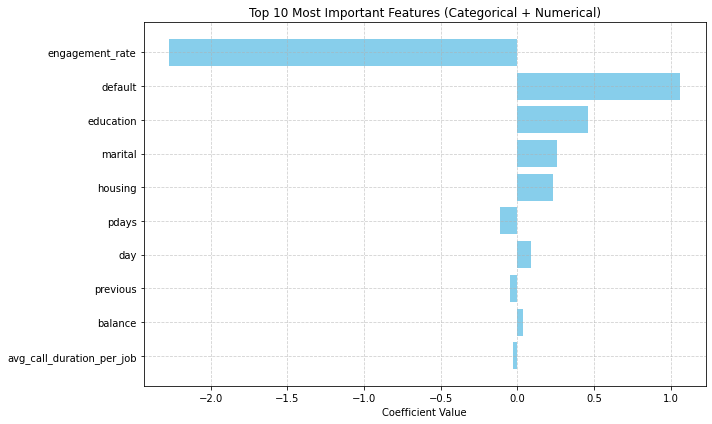

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
# Extract the best logistic regression model
best_lr_model = best_model.stages[-1]  # Extract Logistic Regression model

# Extract feature coefficients and intercept
coefficients = best_lr_model.coefficients

# Define categorical and numerical columns
categorical_cols = ["marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "age_group"]
numerical_cols = ["balance", "day", "pdays", "previous", "avg_call_duration_per_job", "engagement_rate"]
num_numerical = len(numerical_cols)

# Extract individual numerical feature coefficients
numerical_coefficients = coefficients[-num_numerical:]
numerical_importance = list(zip(numerical_cols, numerical_coefficients))

# Attempt to extract categorical feature group sizes
categorical_group_sizes = []
for stage in best_model.stages:
    if isinstance(stage, OneHotEncoder):
        try:
            categorical_group_sizes = stage.categorySizes  # Try to extract actual sizes
        except:
            pass
        break

# Fallback if categorySizes not available
if not categorical_group_sizes:
    categorical_group_sizes = [10] * len(categorical_cols)  # Replace with actual values if known

# Compute average importance for each categorical group
categorical_importance = []
offset = 0
for col, group_size in zip(categorical_cols, categorical_group_sizes):
    group_coeffs = coefficients[offset:offset + group_size]
    avg_importance = sum(abs(c) for c in group_coeffs) / group_size
    categorical_importance.append((col, avg_importance))
    offset += group_size

# Combine and sort all importances
all_importance = numerical_importance + categorical_importance
import pandas as pd
importance_df = pd.DataFrame(all_importance, columns=["Feature", "Coefficient"])
importance_df["AbsCoefficient"] = importance_df["Coefficient"].abs()
importance_df = importance_df.sort_values("AbsCoefficient", ascending=False)

# Plot Top 10
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"][:10][::-1], importance_df["Coefficient"][:10][::-1], color='skyblue')
plt.xlabel("Coefficient Value")
plt.title("Top 10 Most Important Features (Categorical + Numerical)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Interpretation of the Chart

The engagement_rate feature has the highest magnitude, with a strong negative coefficient. engagement_rate = (last contact duration / number of contacts performed during this campaign + 1), where + 1 prevents zero division error. This suggests that as engagement_rate increases, the likelihood of subscription decreases. High engagement_rate indicates that the customer has been contacted multiple times but spends very little time on calls. This may suggest a lack of interest or call fatigue, requiring a different outreach strategy. Low engagement_rate suggests that the customer had fewer calls but engaged in longer conversations, which may indicate higher interest and a greater likelihood of conversion. Therefore a strong negative coefficient of engagement rate could mean that customers who receive frequent campaign calls but have shorter interactions may be less likely to subscribe, possibly due to call fatigue or lack of interest. Therefore, the feature importance chart suggests that excessive follow-ups may be ineffective or even counterproductive.

The default feature has a strong positive coefficient, suggesting that customers who previously defaulted on credit are more likely to subscribe. This is an interesting insight because it may indicate that people with previous credit issues might be looking for safer savings options such as term deposits. Therefore, marketing campaigns should highlight the nature of term deposits - guaranteed returns / fixed interest rates and it being a low-risk investment.

Education, Marital and Housing have a moderate positive impact. First, this suggests that customers with higher education levels are more likely to subscribe. This could be due to the fact that they have higher income stability, making term deposits more attractive. Therefore campaign can also target educated individuals with detailed financial benefits of the term deposits for long term wealth growth.

Secondly, Married individuals show a higher likelihood of subscribing. This could be due to the fact that they have joint financial planning responsibilities and they might prioritise stable financial investments for family security. Therefore, the bank can position term deposits as a "Family Savings Plan" to incentivse married individuals of taking up the plan, through perhaps campaigns where they offer higher interest rates for couples depositing together. Campaigns can also be tailored to target marketing on Facebook, parenting forums and family financial blogs.

Thirdly, customers who own houses show a higher likelihood of subscribing. They may be saving for home improvements, renovations or future mortgage payments and may seek fixed income assets to diversify financial portfolios. The bank can highlight how term deposits can be used to fund future home expenses as a "Homeowner’s Investment Plan" and emphasise how term deposits provide liquidity for emergency expenses.